In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

### --- compare AP, precision, recall ---

In [2]:
refinedet = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2/tcb5_im512_freeze_20200806_use_extra/class_df.csv')
refinedet = refinedet.drop('Unnamed: 0', axis=1)
refinedet_cutout = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2/tcb5_im512_freeze_20200806_use_extra_Cutout/class_df.csv')
refinedet_cutout = refinedet_cutout.drop('Unnamed: 0', axis=1)
refinedet_all = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2/tcb5_im512_freeze_20200806_use_extra_All/class_df.csv')
refinedet_all = refinedet_all.drop('Unnamed: 0', axis=1)

In [3]:
ap_df = pd.DataFrame(columns=["AP", "precision", "recall"])
ap_df = ap_df.append(refinedet, ignore_index=True)
ap_df = ap_df.append(refinedet_cutout, ignore_index=True)
ap_df = ap_df.append(refinedet_all, ignore_index=True)
ap_df.index = ["refinedet", "refinedet_color", "refinedet_all"]
ap_df

,AP,precision,recall
refinedet,0.805922,0.497797,0.906902
refinedet_color,0.809666,0.636782,0.889246
refinedet_all,0.802008,0.410526,0.939005


### --- compare accuracy per size ---

In [4]:
det_each_size_df = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2/tcb5_im512_freeze_20200806/each_size_df.csv')
det_each_size_df["order"] = det_each_size_df["Insect_size"].apply(lambda x: np.floor(np.log2(x)))
insect_size = np.asarray(det_each_size_df["order"])
idx, count = np.unique(insect_size, return_counts=True)
insect_size_df = pd.DataFrame({"order": idx, "count": count})

In [5]:
refinedet = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2/tcb5_im512_freeze_20200806_use_extra/all_size_df.csv')
refinedet = refinedet.drop('Unnamed: 0', axis=1)
refinedet_cutout = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2/tcb5_im512_freeze_20200806_use_extra_Cutout/all_size_df.csv')
refinedet_cutout = refinedet_cutout.drop('Unnamed: 0', axis=1)
refinedet_all = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2/tcb5_im512_freeze_20200806_use_extra_All/all_size_df.csv')
refinedet_all = refinedet_all.drop('Unnamed: 0', axis=1)

In [6]:
insect_size_df["Insect_size"] = refinedet["Insect_size"]
insect_size_df

,order,count,Insect_size
0,7.0,15,224.800000
1,8.0,181,394.436464
2,9.0,189,726.137566
3,10.0,84,1420.392857
4,11.0,50,2870.260000
5,12.0,38,6288.526316
6,13.0,47,11189.978723
7,14.0,16,22611.437500
8,15.0,3,37326.666667


In [7]:
all_df = pd.DataFrame()
all_df["order"] = insect_size_df["order"]
all_df["count"] = insect_size_df["count"]
all_df["refinedet"] = refinedet["Accuracy"]
all_df["refinedet_cutout"] = refinedet_cutout["Accuracy"]
all_df["refinedet_all"] = refinedet_all["Accuracy"]
all_df

,order,count,refinedet,refinedet_cutout,refinedet_all
0,7.0,15,0.800000,0.866667,0.866667
1,8.0,181,0.955801,0.922652,0.994475
2,9.0,189,0.873016,0.867725,0.947090
3,10.0,84,0.892857,0.869048,0.880952
4,11.0,50,0.960000,0.920000,0.940000
5,12.0,38,0.868421,0.842105,0.815789
6,13.0,47,0.893617,0.872340,0.914894
7,14.0,16,0.875000,0.937500,0.937500
8,15.0,3,1.000000,1.000000,1.000000


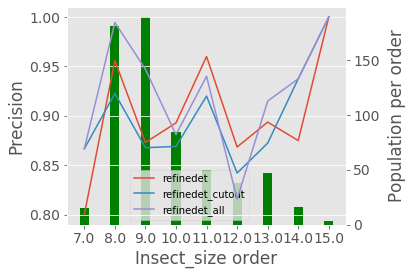

In [8]:
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["7.0", "8.0", "9.0", "10.0", "11.0", "12.0", "13.0", "14.0", "15.0"]

ax1.bar(x_label, all_df["count"], width=0.3, color="g")
ax2.plot(x_label, all_df["refinedet"], label="refinedet")
ax2.plot(x_label, all_df["refinedet_cutout"], label="refinedet_cutout")
ax2.plot(x_label, all_df["refinedet_all"], label="refinedet_all")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.67, 0.), loc='lower right', fontsize=10)

ax1.set_xlabel("Insect_size order")
ax1.set_ylabel("Precision")
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per order")
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/detection/compare_augmentation_combination/compare_accuracy_per_size.png", bbox_inches="tight")